<a href="https://colab.research.google.com/github/JaeKyunKo/Engineering_Department_Tutoring/blob/main/Tutoring_Keras_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Keras**

 One uses keras in order to build neural network

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf #Shortening the name
keras = tf.keras

A lot datasets stored in keras

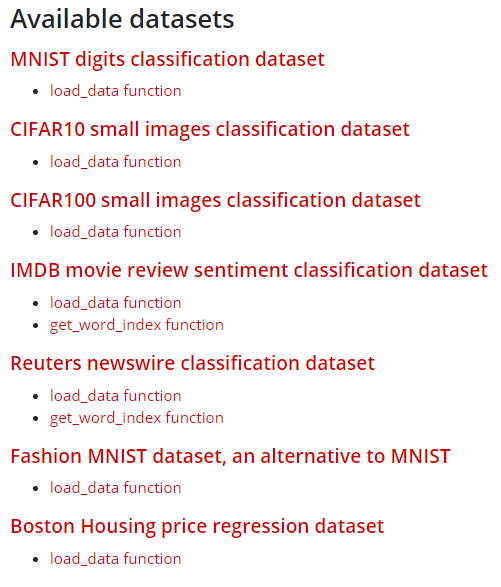

Main object is to build a fully-connected neural network for **MNIST dataset**

First, need to get the dataset

The dataset has two parts

* Train dataset
* Test dataset

In [4]:
mnistDataset = keras.datasets.mnist
(trainImage, trainLabel), (testImage,testLabel) = mnistDataset.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
print(len(trainImage), len(testImage))

60000 10000


In [10]:
print(len(trainImage[0]))

28


Second, normalize the pixel



In [21]:
trainImage = trainImage / 255 #Pixel to 0~1
testImage = testImage / 255 #Pixel to 0~1

Third, build a fully-connected layer

Therefore, need to import libraries for building neural network

In [15]:
from keras.models import Sequential #Model Base
from keras.layers import Dense, Flatten #Fully Connected Layer

In [16]:
model = Sequential()

In [18]:
model.add(Flatten(input_shape = (28, 28)))

In [20]:
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [25]:
model.compile(optimizer = "sgd", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


Run training

In [27]:
history = model.fit(trainImage, trainLabel, batch_size = 128, epochs = 10)

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 1.2271 - accuracy: 0.7030
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4921 - accuracy: 0.8735
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3867 - accuracy: 0.8939
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3430 - accuracy: 0.9036
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3157 - accuracy: 0.9108
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2958 - accuracy: 0.9161
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2793 - accuracy: 0.9208
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2658 - accuracy: 0.9247
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2539 - accuracy: 0.9281
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2431 - accuracy: 0.9312

Evaluate the model

In [29]:
testLoss, testAcc = model.evaluate(testImage, testLabel, verbose = 1)

313/313 [==============================] - 0s 939us/step - loss: 0.2317 - accuracy: 0.9357


In [41]:
class_names  = list()
for i in range(10) :
  class_names.append(str(i))
predictions = model.predict(testImage)

In [42]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

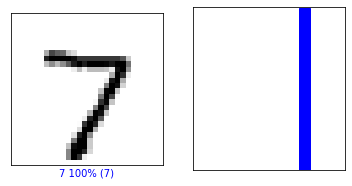

In [43]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, testLabel, testImage)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  testLabel)
plt.show()